In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. FIR filters with firls

In [2]:
from scipy import signal as sig

In [3]:
sample_rate = 1024 
filter_range = np.array([20,45])
trans_width = 0.1
order = int(np.round(7*sample_rate/filter_range[0]))+1

shape = np.array([0,0,1,1,0,0])
freqs = np.array([0 , filter_range[0]-trans_width*filter_range[0],
                 filter_range[0] , filter_range[1],
                 filter_range[1]+trans_width*filter_range[1], sample_rate/2])/(sample_rate/2)

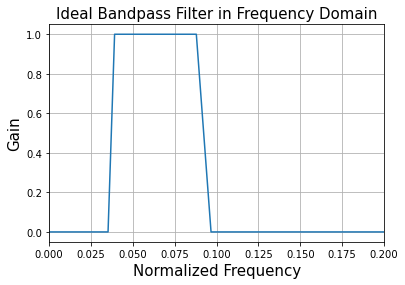

In [4]:
# Ideal Filter Shape: 
plt.plot(freqs , shape)
plt.xlim([0,0.2])
plt.xlabel('Normalized Frequency', fontsize = 15)
plt.ylabel('Gain', fontsize = 15)
plt.title('Ideal Bandpass Filter in Frequency Domain' , fontsize = 15)
plt.grid();

In [5]:
filter_kernel = sig.firls(order , freqs , shape)

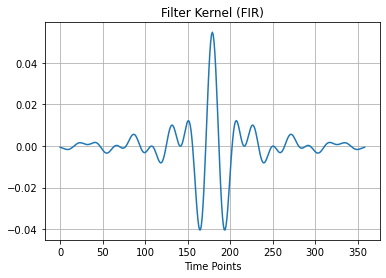

In [6]:
plt.plot(filter_kernel)
plt.xlabel('Time Points')
plt.grid()
plt.title('Filter Kernel (FIR)');

In [7]:
filterpow = np.abs(np.fft.fft(filter_kernel))**2
hz = np.linspace(0 , sample_rate/2 , int(np.floor(len(filter_kernel)/2)+1))
filterpow = filterpow[:len(hz)]

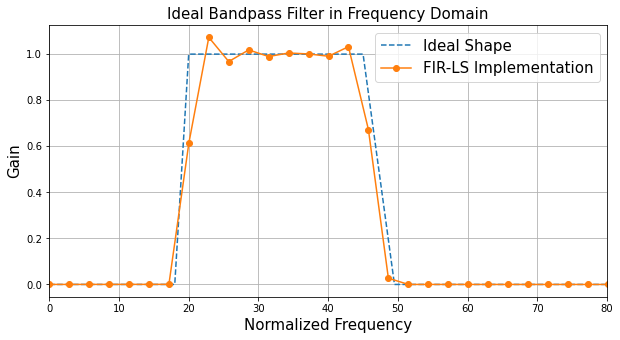

In [8]:
plt.figure(figsize = (10,5))
plt.plot(freqs*sample_rate/2 , shape , linestyle = 'dashed' , label = 'Ideal Shape' )
plt.plot(hz , filterpow[:len(hz)] , label = 'FIR-LS Implementation', marker = 'o')

plt.xlim([0,80])
plt.xlabel('Normalized Frequency', fontsize = 15)
plt.ylabel('Gain', fontsize = 15)
plt.title('Ideal Bandpass Filter in Frequency Domain' , fontsize = 15)
plt.legend(fontsize = 15)
plt.grid();

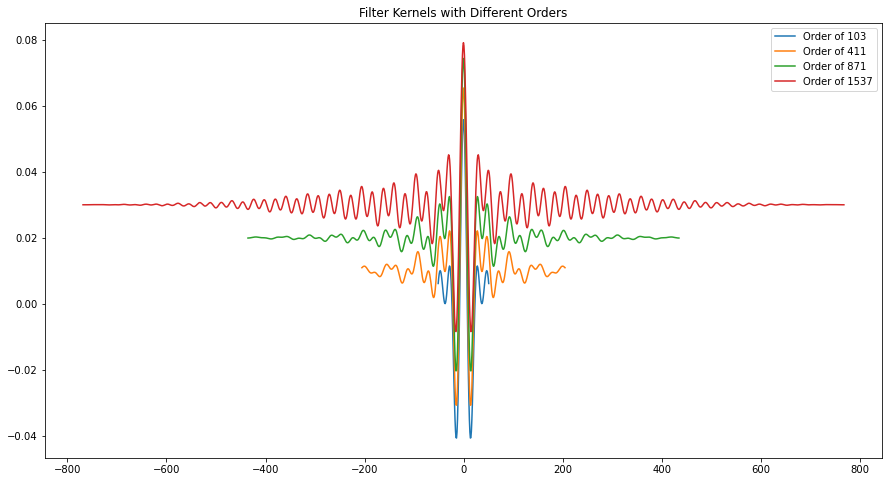

In [9]:
order_list = (np.round(np.array([2,8,17,30])*sample_rate/filter_range[0]))+1
plt.figure(figsize = (15,8))
filterpows = []
hzs = []
list_number = [0]
for i in range(len(order_list)):
    filter_kernel = sig.firls(order_list[i] , freqs , shape)
    hz = np.linspace(0 , sample_rate/2 , int(np.floor(len(filter_kernel)/2)+1))
    hzs = np.append(hzs , hz)
    list_number = np.append(list_number , len(hzs))
    filterpow = np.abs(np.fft.fft(filter_kernel))**2
    filterpows = np.append(filterpows , filterpow[:len(hz)])
    
    plt.plot(np.arange(-len(filter_kernel)/2 , len(filter_kernel)/2) , filter_kernel+ 0.01*i,
            label = 'Order of {}'.format(int(order_list[i])))
plt.title('Filter Kernels with Different Orders')
plt.legend();

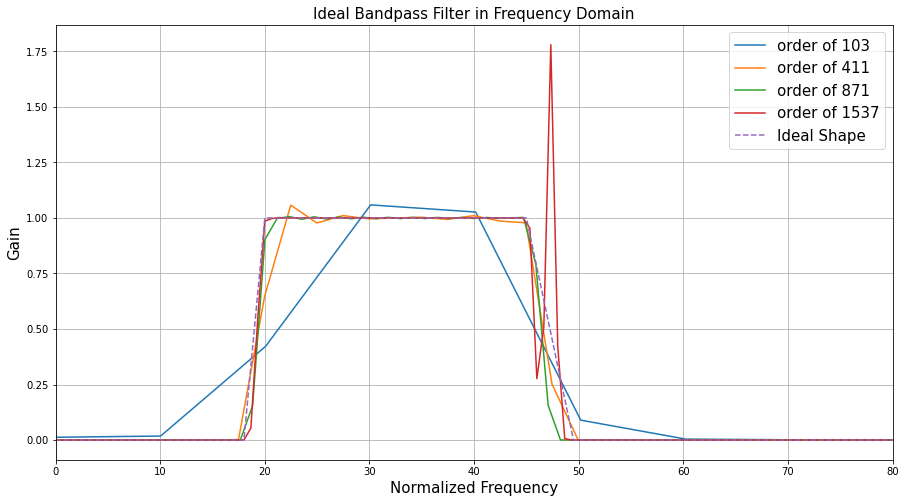

In [10]:
plt.figure(figsize = (15,8))
 
for i in range(1 , len(order_list)+1):
    low = int(list_number[i-1])
    high = int(list_number[i])
    plt.plot(hzs[low:high] , filterpows[low:high],
             label = 'order of {}'.format(int(order_list[i-1])))

plt.plot(freqs*sample_rate/2 , shape , linestyle = 'dashed' , label = 'Ideal Shape' )
plt.xlim([0,80])
plt.xlabel('Normalized Frequency', fontsize = 15)
plt.ylabel('Gain', fontsize = 15)
plt.title('Ideal Bandpass Filter in Frequency Domain' , fontsize = 15)
plt.legend(fontsize = 15)
plt.grid();

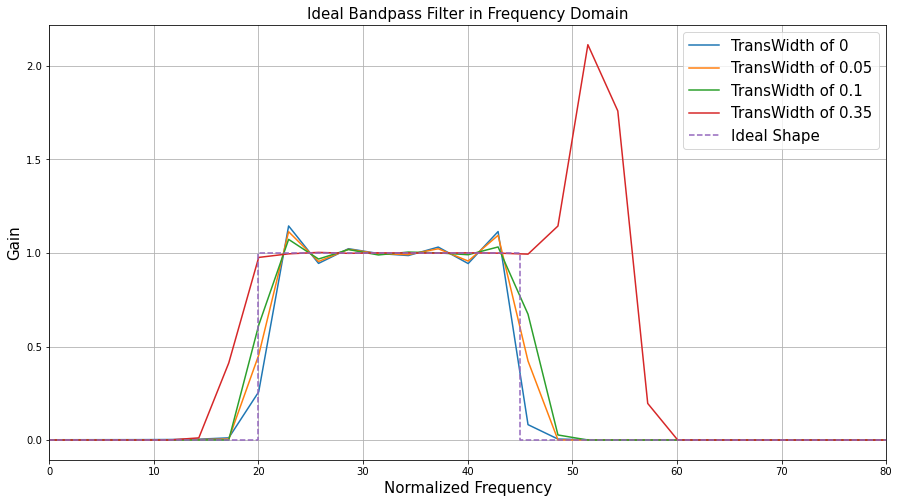

In [11]:
plt.figure(figsize = (15,8))
sample_rate = 1024 
filter_range = np.array([20,45])
trans_width = [0, 0.05 , 0.1 , 0.35]
order = int(np.round(7*sample_rate/filter_range[0]))+1
shape = np.array([0,0,1,1,0,0])
for i in range(len(trans_width)):
    freqs = np.array([0 , filter_range[0]-trans_width[i]*filter_range[0],
                     filter_range[0] , filter_range[1],
                     filter_range[1]+trans_width[i]*filter_range[1], sample_rate/2])/(sample_rate/2)
    filter_kernel = sig.firls(order , freqs , shape)
    hz = np.linspace(0 , sample_rate/2 , int(np.floor(len(filter_kernel)/2)+1))
    filterpow = np.abs(np.fft.fft(filter_kernel))**2
    plt.plot(hz , filterpow[:len(hz)] , label = 'TransWidth of {}'.format(trans_width[i]))
    
    
freqs = np.array([0 , filter_range[0], filter_range[0] , filter_range[1],
                     filter_range[1], sample_rate/2])/(sample_rate/2) 
plt.plot(freqs*sample_rate/2 , shape , linestyle = 'dashed' , label = 'Ideal Shape' )
plt.xlim([0,80])
plt.xlabel('Normalized Frequency', fontsize = 15)
plt.ylabel('Gain', fontsize = 15)
plt.title('Ideal Bandpass Filter in Frequency Domain' , fontsize = 15)
plt.legend(fontsize = 15)
plt.grid();

In [12]:
sample_rate = 1024
nyquist = sample_rate/2
freq_range = np.array([20 , 45])
order = 4

In [13]:
FKernelB , FKernelA = sig.butter(order , freq_range / nyquist , btype='bandpass')

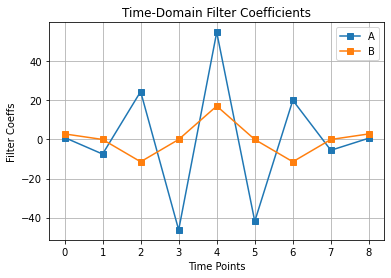

In [14]:
plt.plot(FKernelA , marker = 's' , label = 'A')
plt.plot(1e5*FKernelB , marker = 's' , label = 'B')
plt.xlabel('Time Points')
plt.ylabel('Filter Coeffs')
plt.title('Time-Domain Filter Coefficients')
plt.legend()
plt.grid()

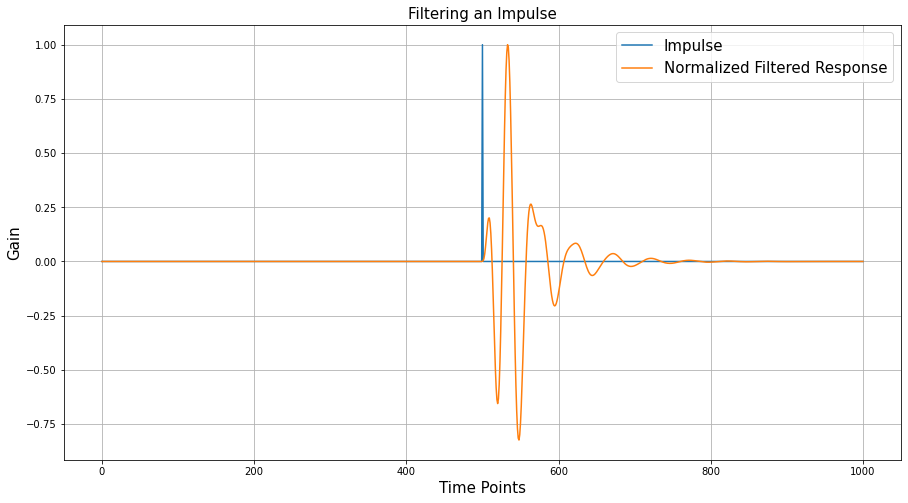

In [15]:
impulse = np.append(np.append(np.zeros(500) , 1) , np.zeros(500))
Fimp = sig.lfilter(FKernelB , FKernelA , impulse)

plt.figure(figsize = (15,8))
plt.plot(impulse , label = 'Impulse')
plt.plot(Fimp/Fimp.max() , label = 'Normalized Filtered Response' )
plt.xlabel('Time Points', fontsize = 15)
plt.ylabel('Gain', fontsize = 15)
plt.title('Filtering an Impulse' , fontsize = 15)
plt.legend(fontsize = 15)
plt.grid();

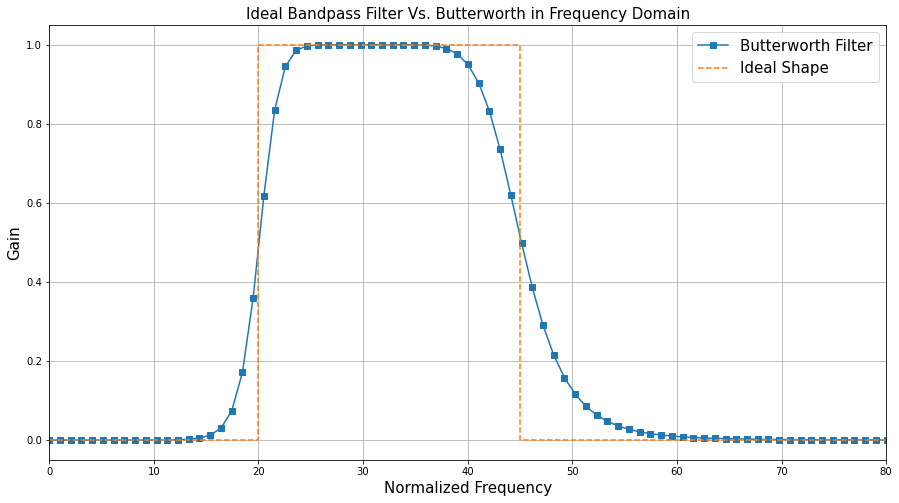

In [16]:
fimpX = np.abs(np.fft.fft(Fimp))**2
hz = np.linspace(0 , nyquist , int(np.floor(len(fimpX)/2)))
plt.figure(figsize = (15,8))
plt.plot(hz , fimpX[:len(hz)], marker = 's' , label = 'Butterworth Filter')
plt.plot(freqs*sample_rate/2 , shape , linestyle = 'dashed' , label = 'Ideal Shape' )
plt.xlim([0,80])
plt.xlabel('Normalized Frequency', fontsize = 15)
plt.ylabel('Gain', fontsize = 15)
plt.title('Ideal Bandpass Filter Vs. Butterworth in Frequency Domain' , fontsize = 15)
plt.legend(fontsize = 15)
plt.grid();

In [17]:
order_list = np.arange(2,7)

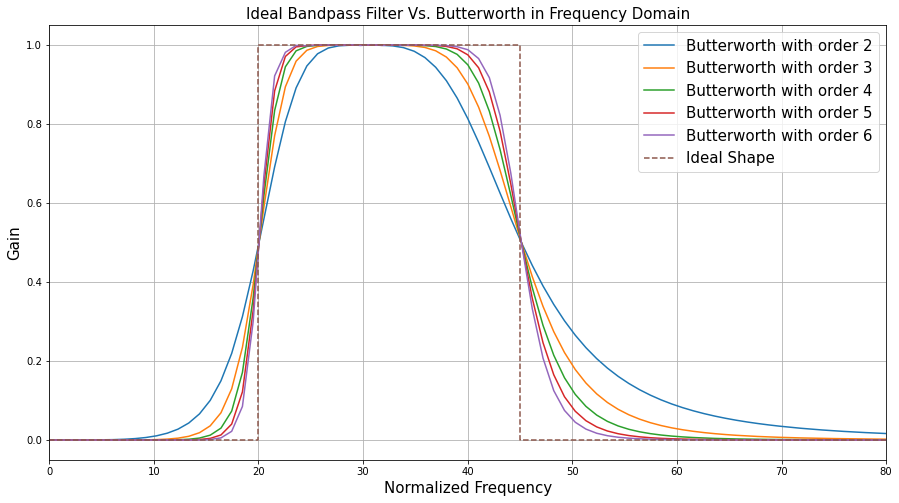

In [18]:
plt.figure(figsize = (15,8))
for i in range(len(order_list)):
    FkernelB , FkernelA = sig.butter(order_list[i] , freq_range / nyquist , btype='bandpass')
    Fimp = sig.lfilter(FkernelB , FkernelA , impulse)
    fimpX = np.abs(np.fft.fft(Fimp))**2
    hz = np.linspace(0 , nyquist , int(np.floor(len(fimpX)/2)))
    fimpX = fimpX[:len(hz)]
    plt.plot(hz,fimpX , label = 'Butterworth with order {}'.format(order_list[i]))
plt.plot(freqs*sample_rate/2 , shape , linestyle = 'dashed' , label = 'Ideal Shape' )
plt.xlim([0,80])
plt.xlabel('Normalized Frequency', fontsize = 15)
plt.ylabel('Gain', fontsize = 15)
plt.title('Ideal Bandpass Filter Vs. Butterworth in Frequency Domain' , fontsize = 15)
plt.legend(fontsize = 15)
plt.grid();

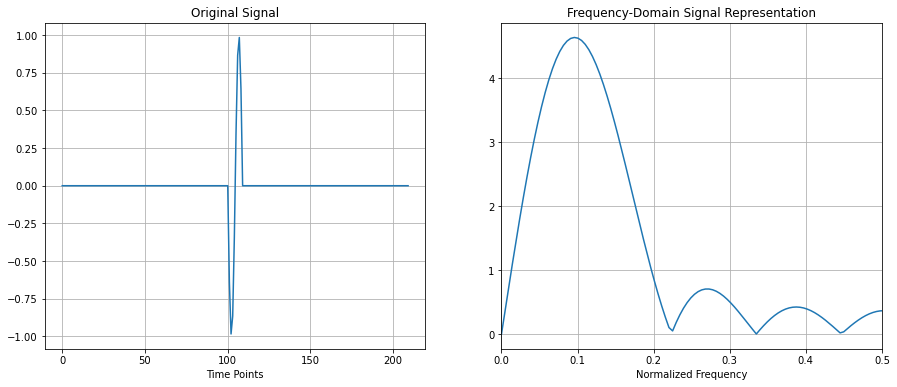

In [19]:
Signal = np.append(np.zeros(100) , np.cos(np.linspace(np.pi/2 , 5*np.pi/2 , 10)))
Signal = np.append(Signal , np.zeros(100))

fig , ax = plt.subplots(nrows = 1 , ncols = 2 , figsize = (15,6))
ax[0].plot(Signal)
ax[0].set_title('Original Signal')
ax[0].set_xlabel('Time Points')
ax[0].grid()

ax[1].plot(np.linspace(0,1,len(Signal)) , np.abs(np.fft.fft(Signal)))
ax[1].set_xlim([0 , 0.5])
ax[1].set_xlabel('Normalized Frequency')
ax[1].set_title('Frequency-Domain Signal Representation')
ax[1].grid()

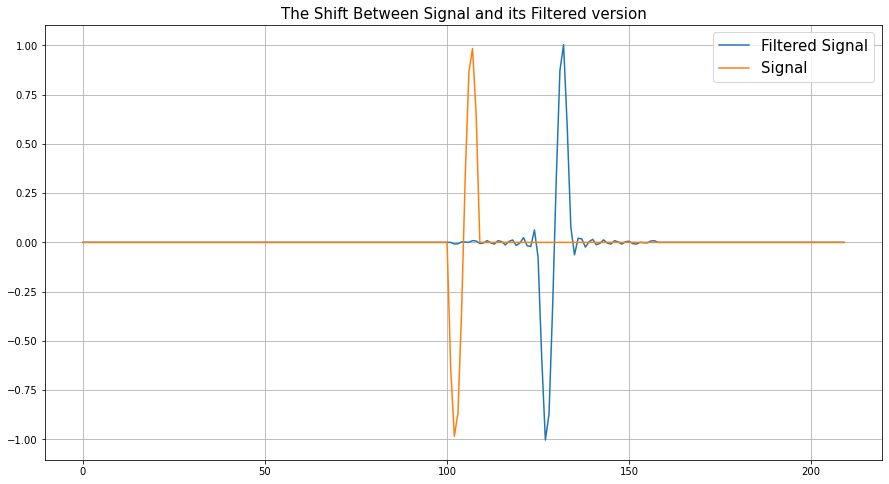

In [20]:
bands = [0 , 0.6 , 0.6001 , 1]
desired = [1 , 1 , 0 , 0]

Filter_kernel = sig.firls(51 , bands , desired)
Filtered_Signal = sig.lfilter(Filter_kernel , 1 , Signal)
plt.figure(figsize = (15,8))
plt.plot(Filtered_Signal , label = 'Filtered Signal')
plt.plot(Signal , label = 'Signal')
plt.grid()
plt.legend(fontsize = 15)
plt.title('The Shift Between Signal and its Filtered version' , fontsize = 15);

In [21]:
Flip_Signal = Filtered_Signal[::-1]
Filtered_Flip_Signal = sig.lfilter(Filter_kernel , 1 , Flip_Signal)
Filtered_Flip_Signal = Filtered_Flip_Signal[::-1]

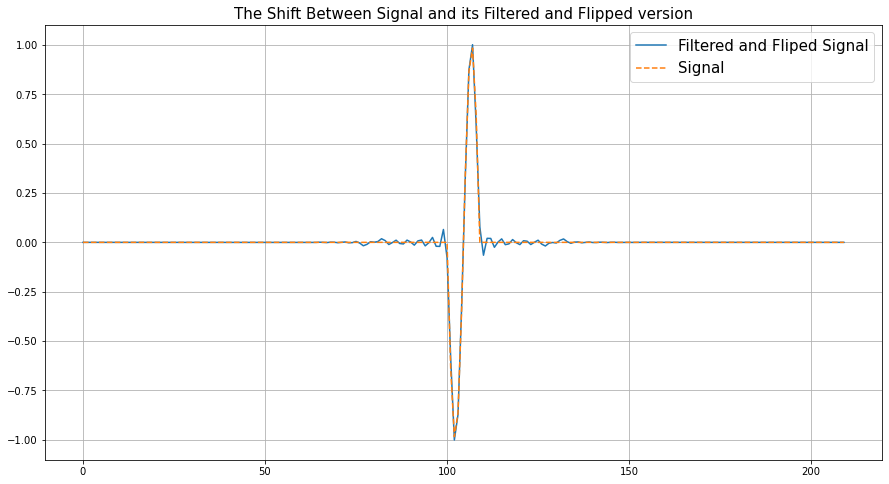

In [22]:
plt.figure(figsize = (15,8))
plt.plot(Filtered_Flip_Signal , label = 'Filtered and Fliped Signal')
plt.plot(Signal , label = 'Signal' , linestyle = 'dashed')
plt.grid()
plt.legend(fontsize = 15)
plt.title('The Shift Between Signal and its Filtered and Flipped version' , fontsize = 15);

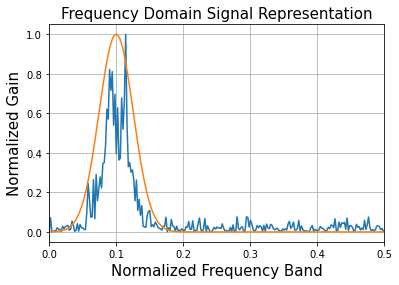

In [23]:
N = 500
hz = np.linspace(0 , 1 , N)
gx = np.exp(- (4*np.log(2)*(hz-0.1)/0.1)**2)*N/2
signal = np.real(np.fft.ifft(gx * np.exp(1j*np.random.rand(N)*2*np.pi))) + np.random.randn(N)
plt.plot(hz , np.abs(np.fft.fft(signal))**2 / np.max(np.abs(np.fft.fft(signal))**2))
plt.plot(hz , (gx) / np.max(gx))
plt.title('Frequency Domain Signal Representation' , fontsize = 15)
plt.ylabel('Normalized Gain', fontsize = 15)
plt.xlabel('Normalized Frequency Band', fontsize = 15)
plt.xlim([0 , 0.5])
plt.grid();

In [24]:
bands = [0 , 0.6 , 0.6001 , 1]
desired = [1 , 1 , 0 , 0]
order = 151 

Filter_kernel = sig.firls(order , bands , desired)
Filtered_signal = sig.lfilter(Filter_kernel , 1 , signal)
Flip_signal = Filtered_signal[::-1]
FF_signal = sig.lfilter(Filter_kernel , 1 , Flip_signal)
Filtered_signal = FF_signal[::-1]

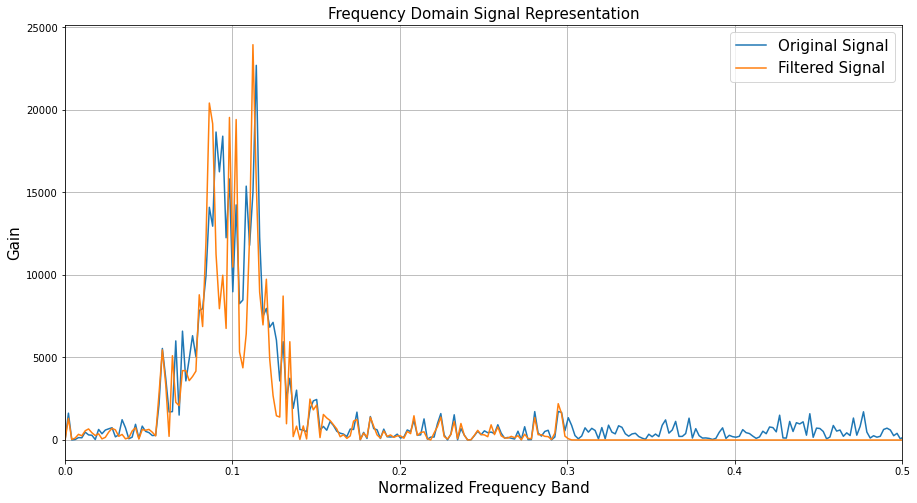

In [25]:
plt.figure(figsize = (15,8))
plt.plot(hz , np.abs(np.fft.fft(signal))**2 , label = 'Original Signal')
plt.plot(hz , np.abs(np.fft.fft(Filtered_signal))**2 , label = 'Filtered Signal')
plt.title('Frequency Domain Signal Representation' , fontsize = 15)
plt.ylabel('Gain', fontsize = 15)
plt.xlabel('Normalized Frequency Band', fontsize = 15)
plt.xlim([0 , 0.5])
plt.legend(fontsize = 15)
plt.grid();

But why the signal shape in frequency domain is also affected in the range of `[0 , 0.3]` ? \
The reason could be found by addressing the edge effect ...  

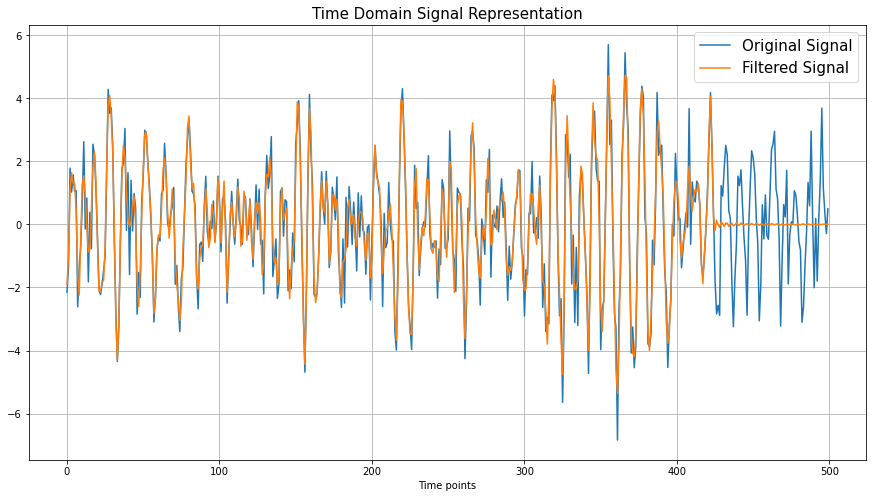

In [26]:
plt.figure(figsize = (15,8))
plt.plot(signal , label = 'Original Signal')
plt.plot(Filtered_signal , label = 'Filtered Signal')
plt.title('Time Domain Signal Representation' , fontsize = 15)
plt.xlabel('Time points')
plt.legend(fontsize = 15)
plt.grid()

In [27]:
New_signal = np.append(np.append(signal[order::-1] , signal) , signal[:N-order:-1])

Filtered_signal_reflect = sig.lfilter(Filter_kernel , 1 , New_signal)
Flip_signal_reflect = Filtered_signal_reflect[::-1]
FF_signal_reflect = sig.lfilter(Filter_kernel , 1 , Flip_signal_reflect)
Filtered_signal_reflect = FF_signal_reflect[::-1][order:N+order]

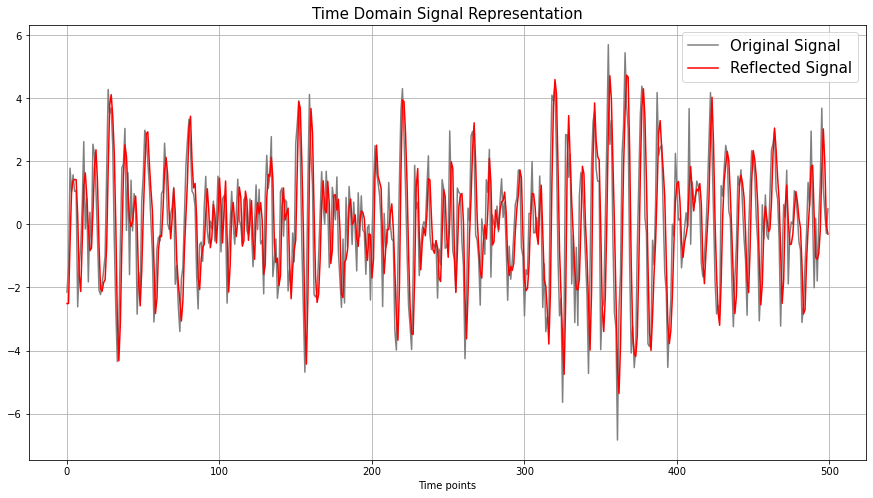

In [28]:
plt.figure(figsize = (15,8))
plt.plot(signal , label = 'Original Signal' , color ='grey')
plt.plot(Filtered_signal_reflect , label = 'Reflected Signal' , color = 'r')
plt.title('Time Domain Signal Representation' , fontsize = 15)
plt.xlabel('Time points')
plt.legend(fontsize = 15)
plt.grid()

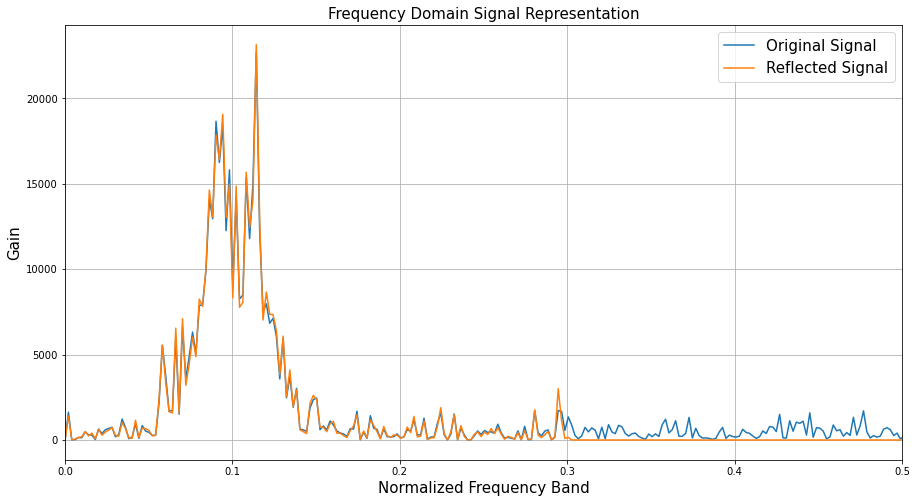

In [29]:
plt.figure(figsize = (15,8))
plt.plot(hz , np.abs(np.fft.fft(signal))**2 , label = 'Original Signal')
plt.plot(hz , np.abs(np.fft.fft(Filtered_signal_reflect))**2 , label = 'Reflected Signal')
plt.title('Frequency Domain Signal Representation' , fontsize = 15)
plt.ylabel('Gain', fontsize = 15)
plt.xlabel('Normalized Frequency Band', fontsize = 15)
plt.xlim([0 , 0.5])
plt.legend(fontsize = 15)
plt.grid();

## Notch Filter 

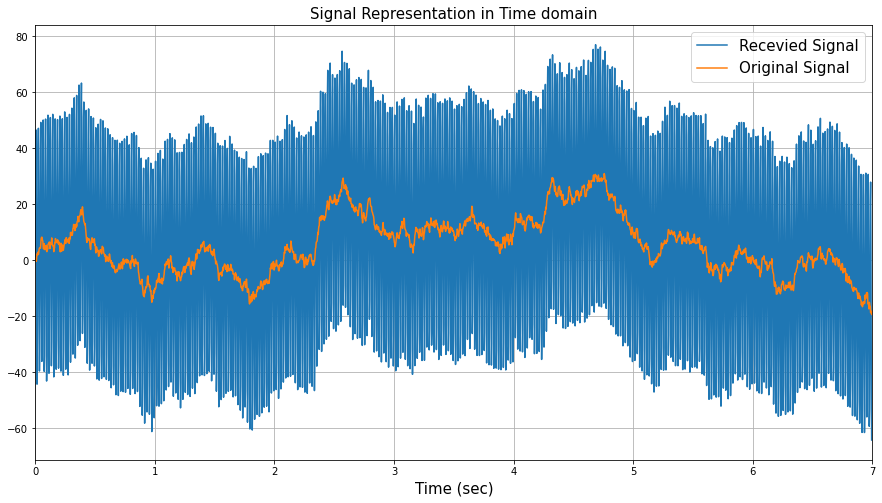

In [30]:
Fs = 350 #Hz
Nyq = int(np.floor((Fs)/2))
time = 7 # sec
timevec = np.arange(0 , time*Fs-1) / Fs 
Npnts = len(timevec)
np.random.seed(37)

y = np.cumsum(np.random.randn(Npnts))
y_Noise = y + np.random.randn(Npnts) + 1.5*np.max(y)*np.sin(2*np.pi*50*timevec)

plt.figure(figsize = (15,8))
plt.plot(timevec , y_Noise , label = 'Recevied Signal')
plt.plot(timevec , y , label = 'Original Signal')
plt.title('Signal Representation in Time domain' , fontsize = 15)
plt.xlabel('Time (sec)', fontsize = 15)
plt.legend(fontsize = 15)
plt.xlim([0,7])
plt.grid()

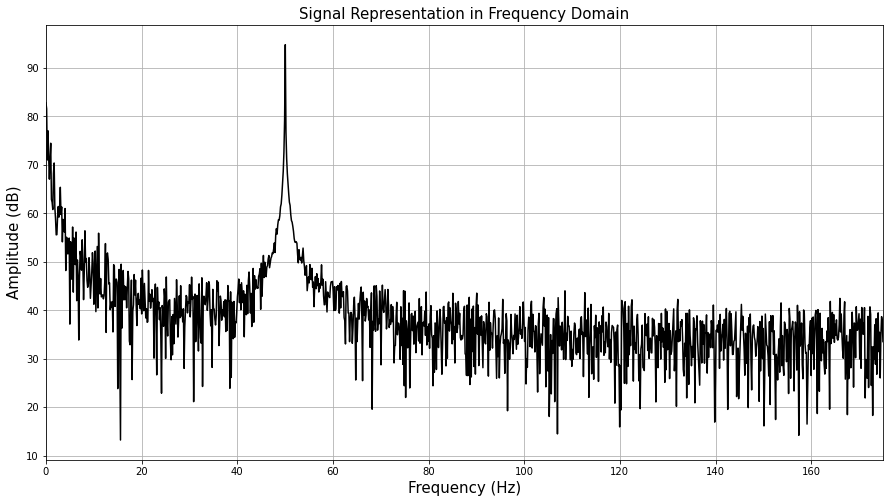

In [31]:
y_fft = np.abs(np.fft.fft(y_Noise))**2
hz = np.linspace(0 , Fs , Npnts)

plt.figure(figsize = (15,8))
plt.plot(hz , 10*np.log10(y_fft) , color = 'black')
plt.title('Signal Representation in Frequency Domain' , fontsize = 15)
plt.xlabel('Frequency (Hz)', fontsize = 15)
plt.ylabel('Amplitude (dB)', fontsize = 15)
plt.grid()
plt.xlim([0 , hz[int(np.floor(Npnts/2))]]);

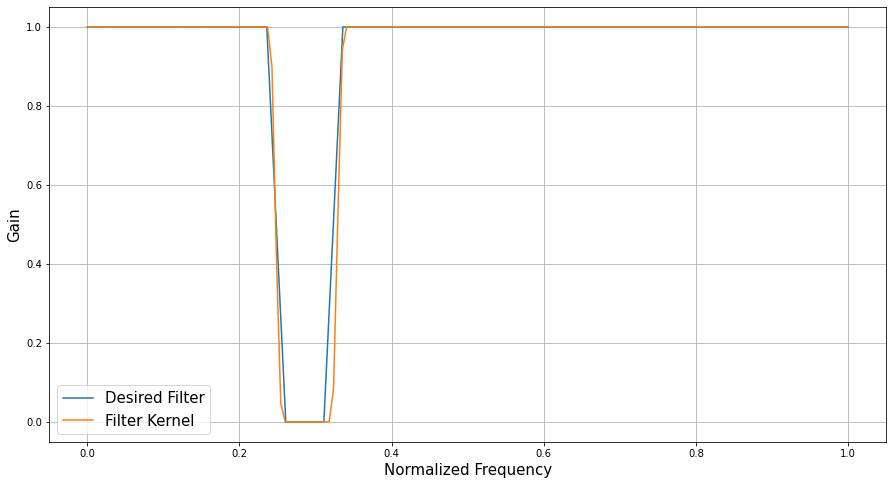

In [32]:
Notch = hz[np.argmax(y_fft)]/Fs*2
trans = 0.025
bands = [0 , Notch-2*trans , Notch-trans , Notch+trans , Notch+2*trans , 1]
desired = [1 , 1 , 0 , 0 , 1 , 1]
order = int(np.floor(Npnts/7)) 

Filter_kernel = sig.firls(order , bands , desired)
hzf = np.linspace(0,1,int(np.floor(len(Filter_kernel)/2)))
plt.figure(figsize = (15,8))
plt.plot(bands , desired , label = 'Desired Filter')
plt.plot(hzf, (np.abs(np.fft.fft(Filter_kernel))**2)[:len(hzf)] , label = "Filter Kernel")
plt.xlabel('Normalized Frequency',fontsize = 15)
plt.ylabel('Gain',fontsize = 15)
plt.grid()
plt.legend(fontsize = 15);

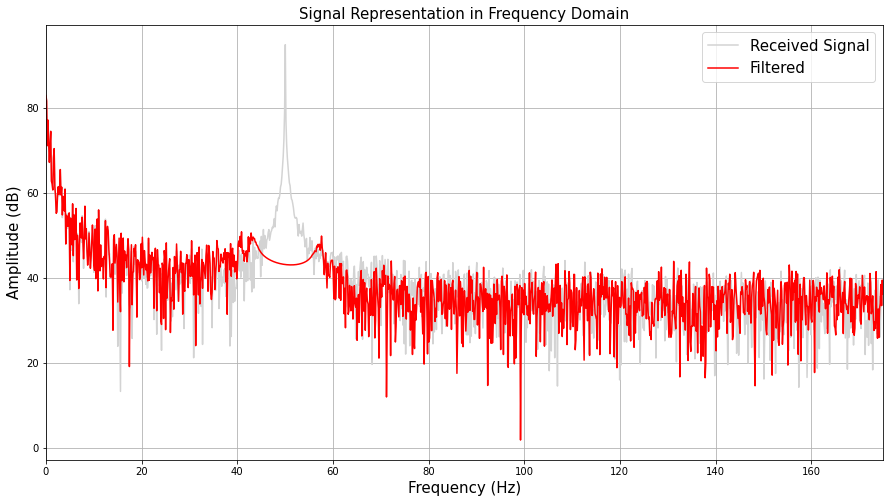

In [33]:
y_reflect = np.append(np.append(y_Noise[order::-1] , y_Noise) , y_Noise[:Npnts-order:-1])

Filtered_y = sig.lfilter(Filter_kernel , 1 , y_reflect)
Filtered_y = sig.lfilter(Filter_kernel , 1 , Filtered_y[::-1])[::-1][order:Npnts+order]
Filtered_y_fft = np.abs(np.fft.fft(Filtered_y))**2


plt.figure(figsize = (15,8))
plt.plot(hz , 10*np.log10(y_fft) , color = 'lightgrey' , label = 'Received Signal')
plt.plot(hz , 10*np.log10(Filtered_y_fft) , color = 'r' , label = 'Filtered')
plt.title('Signal Representation in Frequency Domain' , fontsize = 15)
plt.xlabel('Frequency (Hz)', fontsize = 15)
plt.ylabel('Amplitude (dB)', fontsize = 15)
plt.legend(fontsize = 15)
plt.grid()
plt.xlim([0 , hz[int(np.floor(Npnts/2))]]);

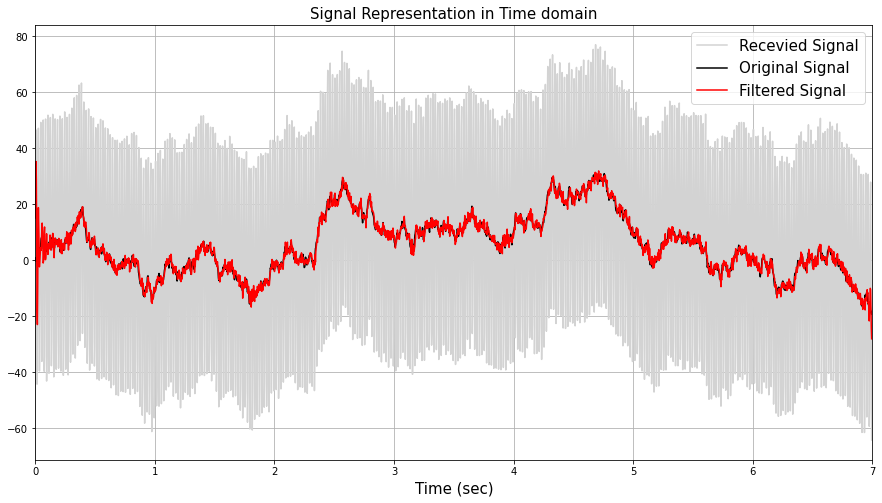

In [34]:
plt.figure(figsize = (15,8))
plt.plot(timevec , y_Noise , label = 'Recevied Signal' , color = 'lightgrey')
plt.plot(timevec , y , label = 'Original Signal' , color = 'black')
plt.plot(timevec , Filtered_y , label = 'Filtered Signal' , color = 'r')
plt.title('Signal Representation in Time domain' , fontsize = 15)
plt.xlabel('Time (sec)', fontsize = 15)
plt.legend(fontsize = 15)
plt.xlim([0,7])
plt.grid()

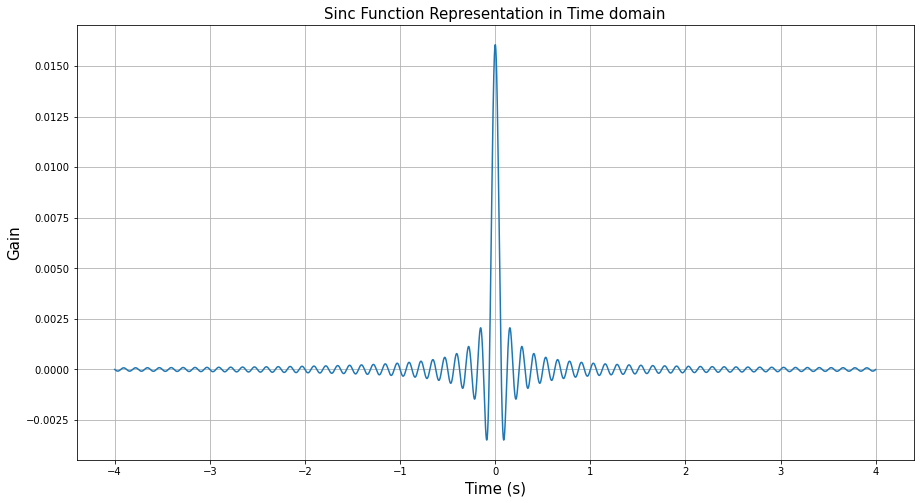

In [35]:
sample_rate = 1000 #Hz
timevec = np.arange(-4 , 4 , 1/sample_rate)
Npnts = len(timevec)

cut_freq = 8 # Hz
sinc_filt = np.sinc(2*cut_freq*timevec) # It is because the sinc function in python has np.pi by its own ... 
sinc_filt = sinc_filt / np.sum(sinc_filt)
plt.figure(figsize = (15,8))
plt.plot(timevec , sinc_filt)
plt.xlabel('Time (s)', fontsize = 15)
plt.ylabel('Gain', fontsize = 15)
plt.title('Sinc Function Representation in Time domain' , fontsize = 15)
plt.grid()

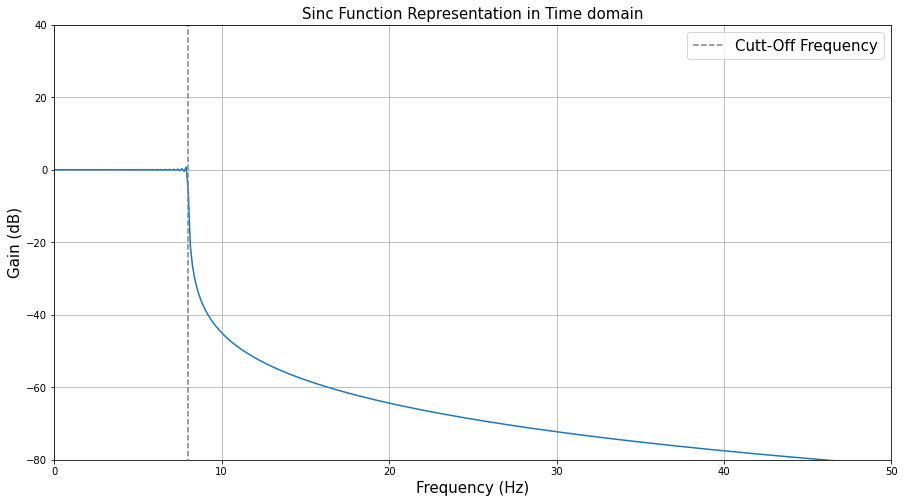

In [36]:
sinc_filt_fft = np.abs(np.fft.fft(sinc_filt))**2
hz = np.linspace(0 , sample_rate , Npnts)

plt.figure(figsize = (15,8))
plt.plot(hz , 10*np.log10(sinc_filt_fft))
plt.xlabel('Frequency (Hz)', fontsize = 15)
plt.ylabel('Gain (dB)', fontsize = 15)
plt.title('Sinc Function Representation in Time domain' , fontsize = 15)

plt.xlim([0 , 50])
y_min , y_max = plt.ylim([-80,40])
plt.axvline(x = 8 , ymin = y_min , ymax = y_max , linestyle = 'dashed' , c = 'grey' , label = 'Cutt-Off Frequency')

plt.legend(fontsize=15)
plt.grid()

Now we could see the `sinc(x)` function could be utilized as a low-pass filter...

In [37]:
# Hann Window:
han_win = 0.5 - np.cos(2*np.pi*np.linspace(0 , 1 , Npnts)) / 2
# Hamming Window:
ham_win = 0.54 - 0.46*np.cos(2*np.pi*np.linspace(0 , 1 , Npnts))
# Gaussian Window:
gaus_win = np.exp(-timevec**2)

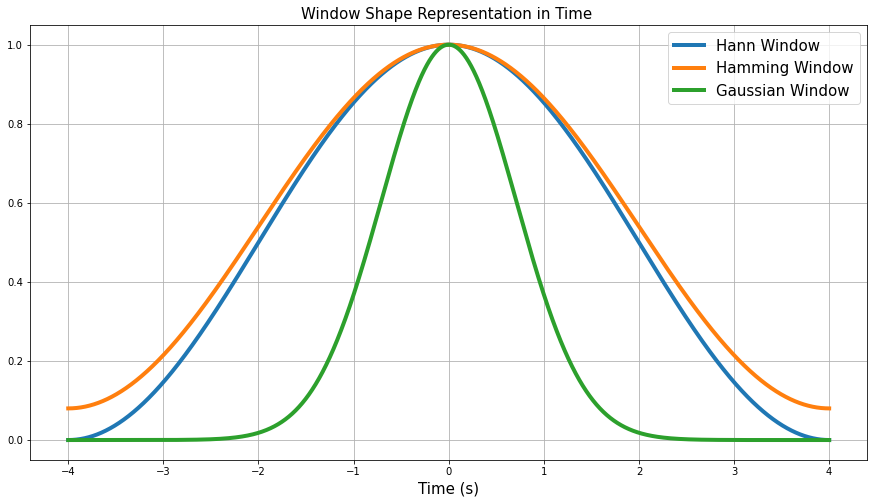

In [38]:
fig , ax = plt.subplots(figsize = (15,8) , 
                        nrows = 1,
                        ncols = 1)
ax.plot(timevec , han_win , label = 'Hann Window' , linewidth = 4)
ax.plot(timevec , ham_win , label = 'Hamming Window', linewidth = 4)
ax.plot(timevec , gaus_win , label = 'Gaussian Window', linewidth = 4)
ax.set_xlabel('Time (s)' , fontsize = 15)
ax.set_title('Window Shape Representation in Time ' , fontsize = 15)
ax.grid()
ax.legend(fontsize = 15);

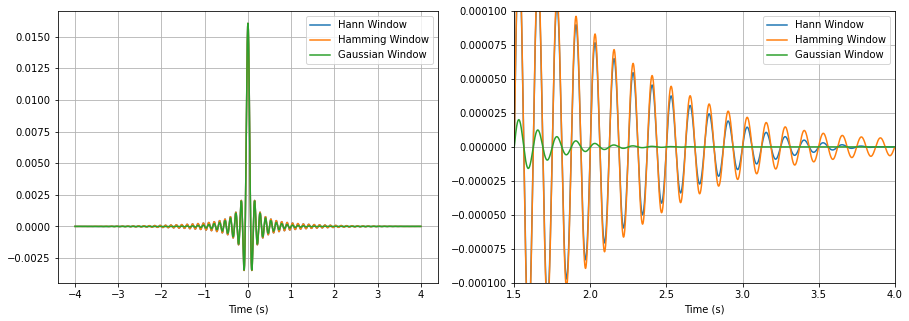

In [39]:
fig , ax = plt.subplots(figsize = (15,5) , 
                        nrows = 1,
                        ncols = 2)
ax[0].plot(timevec , sinc_filt*han_win , label = 'Hann Window')
ax[0].plot(timevec , sinc_filt*ham_win , label = 'Hamming Window')
ax[0].plot(timevec , sinc_filt*gaus_win , label = 'Gaussian Window')
ax[0].set_xlabel('Time (s)')
ax[0].grid()
ax[0].legend()

ax[1].plot(timevec , sinc_filt*han_win , label = 'Hann Window')
ax[1].plot(timevec , sinc_filt*ham_win , label = 'Hamming Window')
ax[1].plot(timevec , sinc_filt*gaus_win , label = 'Gaussian Window')
ax[1].set_xlabel('Time (s)')
ax[1].set_xlim([1.5, 4])
ax[1].set_ylim([-0.0001, 0.0001])
ax[1].grid()
ax[1].legend();

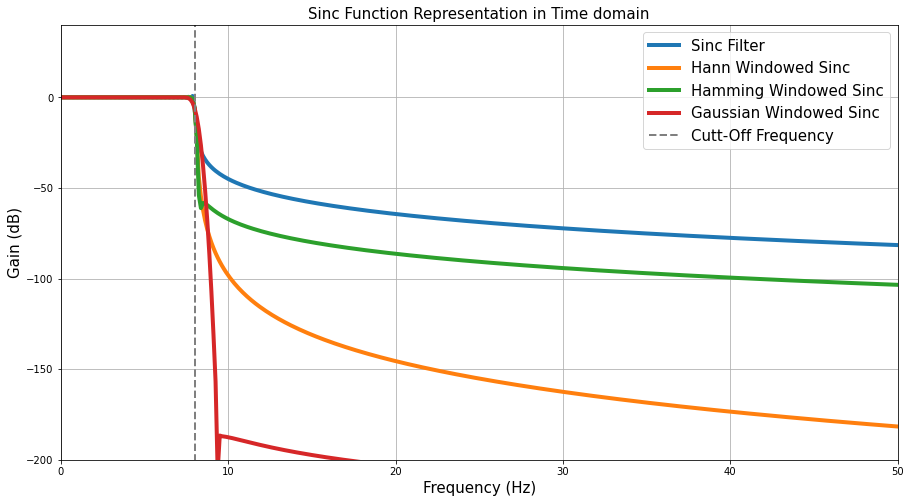

In [40]:
sinc_filt_fft = np.abs(np.fft.fft(sinc_filt))**2
sinc_filt_han_fft = np.abs(np.fft.fft(sinc_filt * han_win))**2
sinc_filt_ham_fft = np.abs(np.fft.fft(sinc_filt * ham_win))**2
sinc_filt_gaus_fft = np.abs(np.fft.fft(sinc_filt * gaus_win))**2
hz = np.linspace(0 , sample_rate , Npnts)

plt.figure(figsize = (15,8))
plt.plot(hz , 10*np.log10(sinc_filt_fft) , label = 'Sinc Filter' , linewidth = 4)
plt.plot(hz , 10*np.log10(sinc_filt_han_fft) , label = 'Hann Windowed Sinc', linewidth = 4)
plt.plot(hz , 10*np.log10(sinc_filt_ham_fft), label = 'Hamming Windowed Sinc', linewidth = 4)
plt.plot(hz , 10*np.log10(sinc_filt_gaus_fft), label = 'Gaussian Windowed Sinc', linewidth = 4)
plt.xlabel('Frequency (Hz)', fontsize = 15)
plt.ylabel('Gain (dB)', fontsize = 15)
plt.title('Sinc Function Representation in Time domain' , fontsize = 15)

plt.xlim([0 , 50])
y_min , y_max = plt.ylim([-200,40])
plt.axvline(x = 8 , ymin = y_min , ymax = y_max,
            linestyle = 'dashed' , c = 'grey' , label = 'Cutt-Off Frequency', linewidth = 2)

plt.legend(fontsize=15)
plt.grid()

In [41]:
data_orig = np.cumsum(np.random.randn(Npnts))
np.random.seed(37)
hz = np.linspace(0 , sample_rate , Npnts)
gx = np.exp(- (4*np.log(2)*(hz-0.15*sample_rate)/(0.09*sample_rate))**2)*Npnts/2
Noise = 20*np.real(np.fft.ifft(gx * np.exp(1j*np.random.rand(Npnts)*2*np.pi))) + np.random.randn(Npnts)

data = data_orig + Noise


hz = np.linspace(0,sample_rate , Npnts)
data_fft = np.abs(np.fft.fft(data))**2
data_orig_fft = np.abs(np.fft.fft(data_orig))**2
Noise_fft = np.abs(np.fft.fft(Noise))**2

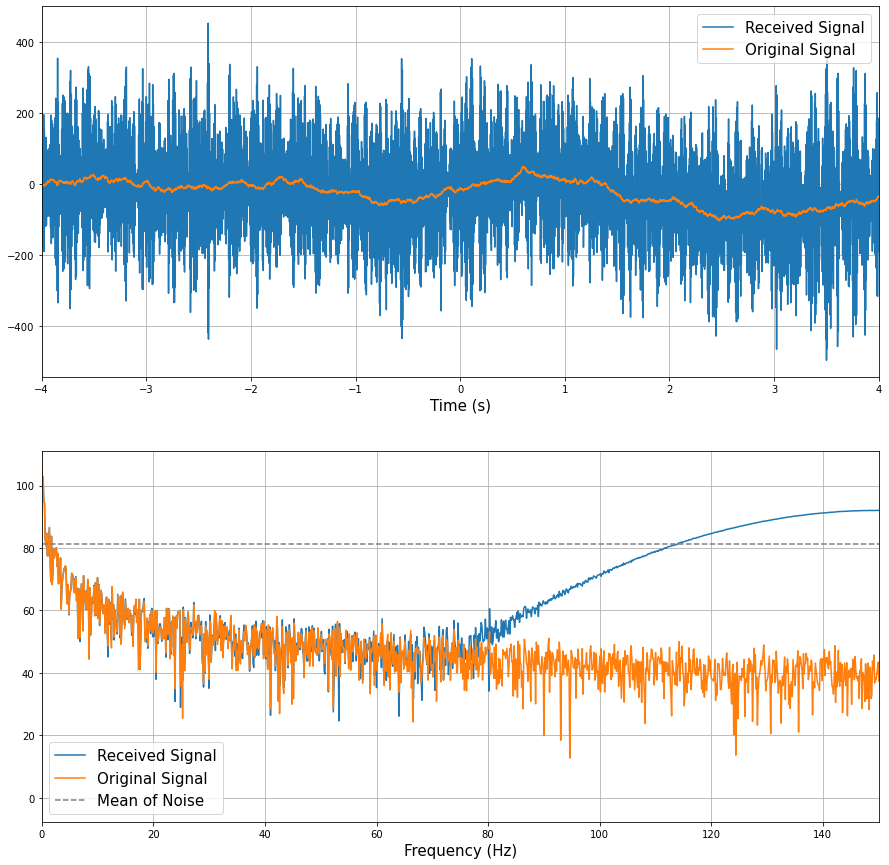

In [42]:
fig , ax = plt.subplots(nrows = 2,
                        ncols = 1 , 
                        figsize = (15,15))
ax[0].plot(timevec , data , label = 'Received Signal')
ax[0].plot(timevec , data_orig , label = 'Original Signal')
ax[0].grid()
ax[0].legend(fontsize = 15)
ax[0].set_xlabel('Time (s)' , fontsize = 15)
ax[0].set_xlim([-4,4])

ax[1].plot(hz , 10*np.log10(data_fft) , label = 'Received Signal')
ax[1].plot(hz , 10*np.log10(data_orig_fft) , label = 'Original Signal')
ax[1].axhline(10*np.log10(np.mean(Noise_fft)) , linestyle = 'dashed' , c = 'grey' , label = 'Mean of Noise')
ax[1].grid()
ax[1].legend(fontsize = 15)
ax[1].set_xlabel('Frequency (Hz)' , fontsize = 15)
ax[1].set_xlim([0,150]);

By looking at these figures, it is apparent that the Original Signal power is always lower than the noise power above `75 Hz`and so their information could not be extracted. We could use a low-pass filter in order to derive the useful information. 

In [43]:
cut_freq = 75 # Hz
sinc_filt = np.sinc(2*cut_freq*timevec) # It is because the sinc function in python has np.pi by its own ... 
sinc_filt = sinc_filt / np.sum(sinc_filt)

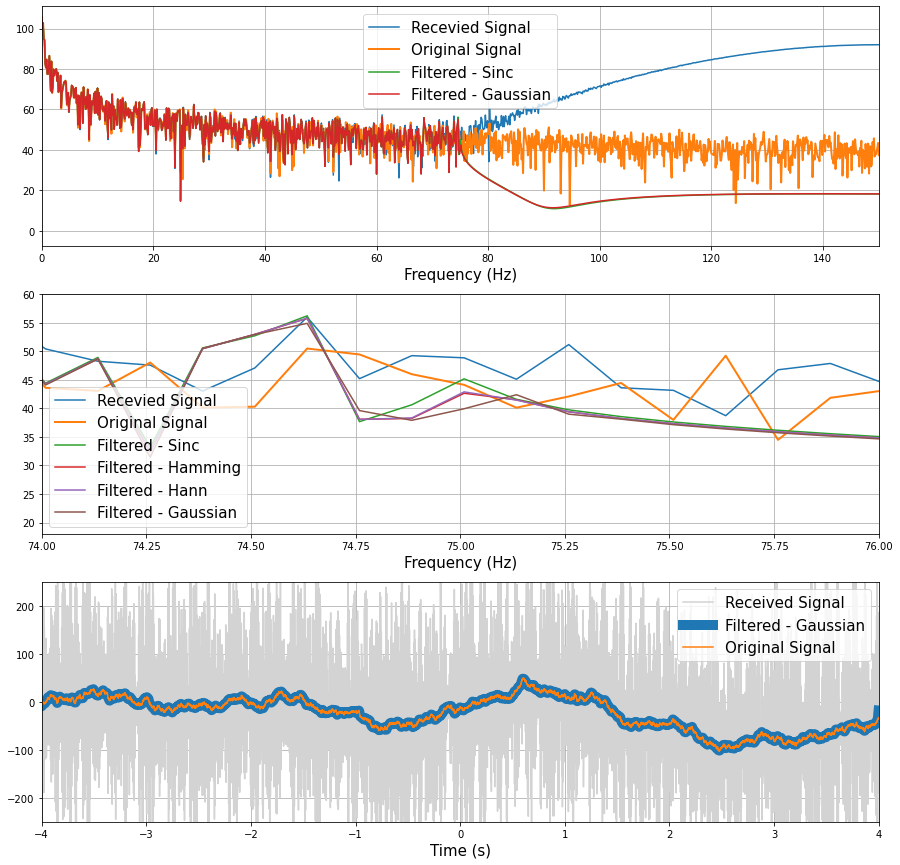

In [44]:
def filter_func(data , filt):
    data_cant = np.append(data , data[::-1])
    data_filt = sig.lfilter(filt , 1 , data_cant)[::-1]
    data_filt = sig.lfilter(filt , 1 , data_filt)[::-1][:len(data)]
    return data_filt
    
data_filt_sinc = filter_func(data , sinc_filt)
data_filt_ham = filter_func(data , sinc_filt * han_win)
data_filt_han = filter_func(data , sinc_filt * ham_win)
data_filt_gaus = filter_func(data , sinc_filt * gaus_win)

data_fft = np.abs(np.fft.fft(data))**2
data_filt_sinc_fft = np.abs(np.fft.fft(data_filt_sinc))**2
data_filt_ham_fft = np.abs(np.fft.fft(data_filt_ham))**2
data_filt_han_fft = np.abs(np.fft.fft(data_filt_han))**2
data_filt_gaus_fft = np.abs(np.fft.fft(data_filt_gaus))**2

fig , ax = plt.subplots(nrows = 3,
                        ncols = 1,
                        figsize = (15,15))
ax[0].plot(hz , 10*np.log10(data_fft) , label = 'Recevied Signal')
ax[0].plot(hz , 10*np.log10(data_orig_fft) , linewidth = 2 , label = 'Original Signal')
ax[0].plot(hz , 10*np.log10(data_filt_sinc_fft) , label = 'Filtered - Sinc')
ax[0].plot(hz , 10*np.log10(data_filt_gaus_fft) , label = 'Filtered - Gaussian')
ax[0].set_xlim([0, 150])
ax[0].legend(fontsize = 15)
ax[0].set_xlabel('Frequency (Hz)' , fontsize = 15)
ax[0].grid()

ax[1].plot(hz , 10*np.log10(data_fft) , label = 'Recevied Signal')
ax[1].plot(hz , 10*np.log10(data_orig_fft) , linewidth = 2 , label = 'Original Signal')
ax[1].plot(hz , 10*np.log10(data_filt_sinc_fft) , label = 'Filtered - Sinc')
ax[1].plot(hz , 10*np.log10(data_filt_ham_fft), label = 'Filtered - Hamming')
ax[1].plot(hz , 10*np.log10(data_filt_han_fft), label = 'Filtered - Hann')
ax[1].plot(hz , 10*np.log10(data_filt_gaus_fft) , label = 'Filtered - Gaussian')
ax[1].set_xlim([74, 76])
ax[1].set_ylim([18, 60])
ax[1].legend(fontsize = 15)
ax[1].set_xlabel('Frequency (Hz)' , fontsize = 15)
ax[1].grid()

ax[2].plot(timevec , data , label = 'Received Signal' , c='lightgrey')
ax[2].plot(timevec , data_filt_gaus , label = 'Filtered - Gaussian' , linewidth = 10)
ax[2].plot(timevec , data_orig , label = 'Original Signal')
ax[2].grid()
ax[2].legend(fontsize = 15)
ax[2].set_xlabel('Time (s)' , fontsize = 15)
ax[2].set_xlim([-4,4])
ax[2].set_ylim([-250,250]);

## Two-Stage Wideband Filter

In [45]:
sample_rate = 2048 # Hz
timevec = np.arange(-4 , 4 , 1/sample_rate)
Npnts = len(timevec)
hz = np.linspace(0 , sample_rate , Npnts)

sig_freq_amp = 10*np.random.randn(len(hz))*np.exp(-0.5*(( (hz-500)/(0.1*sample_rate/2) )**2 )) + 0.01*np.random.randn(len(hz))
sig_freq = sig_freq_amp * np.exp(1j*2*np.pi*np.random.rand(Npnts))
Signal = np.real(np.fft.ifft(sig_freq))*Npnts

noise_freq_amp = np.exp(-0.5*(( (hz-sample_rate/2)/(0.8*sample_rate/2) )**2 )) + np.random.randn(len(hz))
noise_freq =  noise_freq_amp * np.exp(1j*2*np.pi*np.random.rand(Npnts))
Noise = np.real(np.fft.ifft(noise_freq))*Npnts

R = Signal + Noise

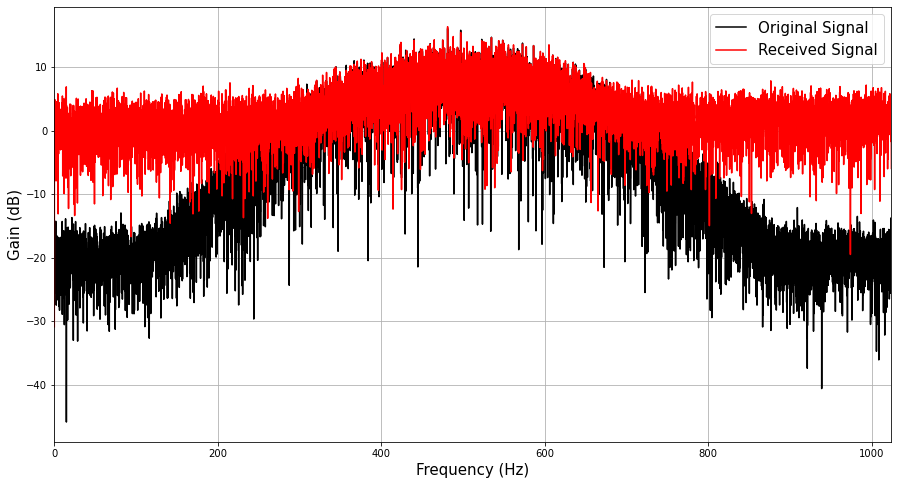

In [46]:
R_fft = np.abs(np.fft.fft(R))/Npnts*2
Signal_fft = np.abs(np.fft.fft(Signal))/Npnts*2
Noise_fft = np.abs(np.fft.fft(Noise))/Npnts*2

plt.figure(figsize = (15,8))
plt.plot(hz , 10*np.log10(Signal_fft) , c = 'black', label = 'Original Signal')
plt.plot(hz , 10*np.log10(R_fft) , c = 'red' , label = "Received Signal")

plt.xlim([0 , sample_rate/2])
plt.xlabel('Frequency (Hz)' , fontsize = 15)
plt.ylabel('Gain (dB)' , fontsize = 15)
plt.grid()
plt.legend(fontsize = 15);

We could see that `Noise` signal distroyed the received signal for the frequencies between `300 Hz` and `700 Hz`. \
So we need a wideband filter. There is two method, one is to create a pass band filter as follows:

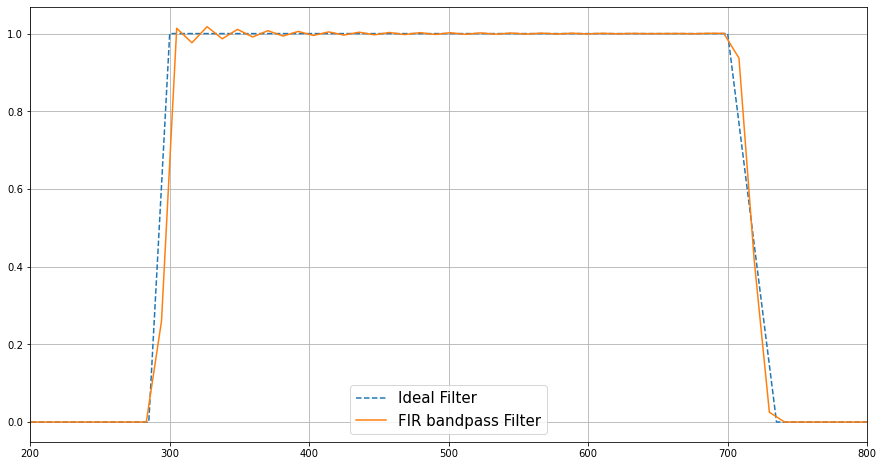

In [47]:
lower_bnd = 300 #Hz
upper_bnd = 700 #Hz

tras_wid = 0.05
filt_order = 27*round(sample_rate/lower_bnd)
ideal_shape = np.array([0, 0, 1, 1, 0, 0])
filt_freqs =  np.array([0, lower_bnd*(1-tras_wid),
                       lower_bnd, upper_bnd,
                       upper_bnd*(1+tras_wid), 
                       (sample_rate/2)]) / (sample_rate/2)

filt_kernel = sig.firls(filt_order , filt_freqs , ideal_shape)
filt_kernel_fft = np.abs(np.fft.fft(filt_kernel))**2
hz = np.linspace(0 , sample_rate , len(filt_kernel_fft))

plt.figure(figsize = (15,8))
plt.plot(filt_freqs*(sample_rate/2) , ideal_shape , linestyle = 'dashed' , label = 'Ideal Filter')
plt.plot(hz , filt_kernel_fft , label = 'FIR bandpass Filter')
plt.legend(fontsize = 15)
plt.grid()
plt.xlim([200 , 800]);

The second method is to create a two-stage filter, consists of two filters, one high-pass and the other one would be low-pass 

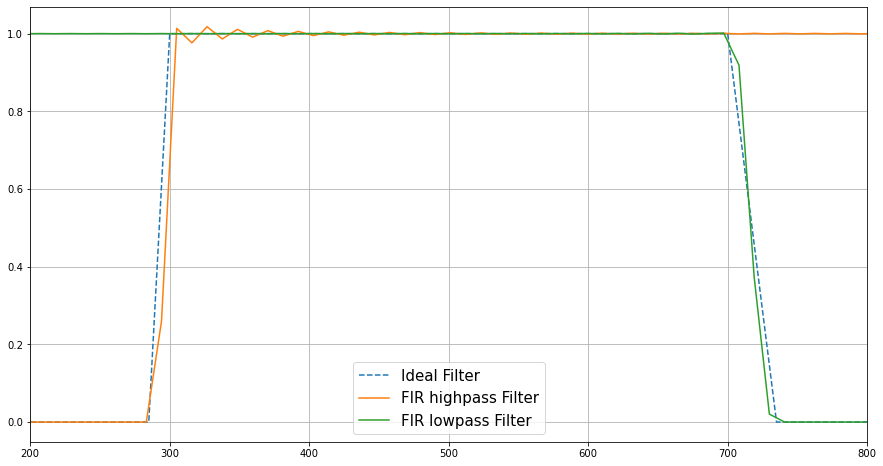

In [48]:
## high-pass filter:

lower_bnd = 300 #Hz
tras_wid = 0.05

filt_high_order = 27*round(sample_rate/lower_bnd)
ideal_high_shape = np.array([0, 0, 1, 1])
filt_high_freqs =  np.array([0, lower_bnd*(1-tras_wid),
                       lower_bnd, (sample_rate/2)]) / (sample_rate/2)

filt_high_kernel = sig.firls(filt_high_order , filt_high_freqs , ideal_high_shape)
filt_high_kernel_fft = np.abs(np.fft.fft(filt_high_kernel))**2
hz_high = np.linspace(0 , sample_rate , len(filt_high_kernel_fft))

## low-pass filter: 

upper_bnd = 700 #Hz
tras_wid = 0.05

filt_low_order = 27*round(sample_rate/lower_bnd)
ideal_low_shape = np.array([1, 1, 0, 0])
filt_low_freqs =  np.array([0, upper_bnd,
                       upper_bnd*(1+tras_wid),  (sample_rate/2)]) / (sample_rate/2)

filt_low_kernel = sig.firls(filt_low_order , filt_low_freqs , ideal_low_shape)
filt_low_kernel_fft = np.abs(np.fft.fft(filt_low_kernel))**2
hz_low = np.linspace(0 , sample_rate , len(filt_low_kernel_fft))


plt.figure(figsize = (15,8))
plt.plot(filt_freqs*(sample_rate/2) , ideal_shape , linestyle = 'dashed' , label = 'Ideal Filter')
plt.plot(hz_high , filt_high_kernel_fft , label = 'FIR highpass Filter')
plt.plot(hz_low , filt_low_kernel_fft , label = 'FIR lowpass Filter')
plt.legend(fontsize = 15)
plt.grid()
plt.xlim([200 , 800]);

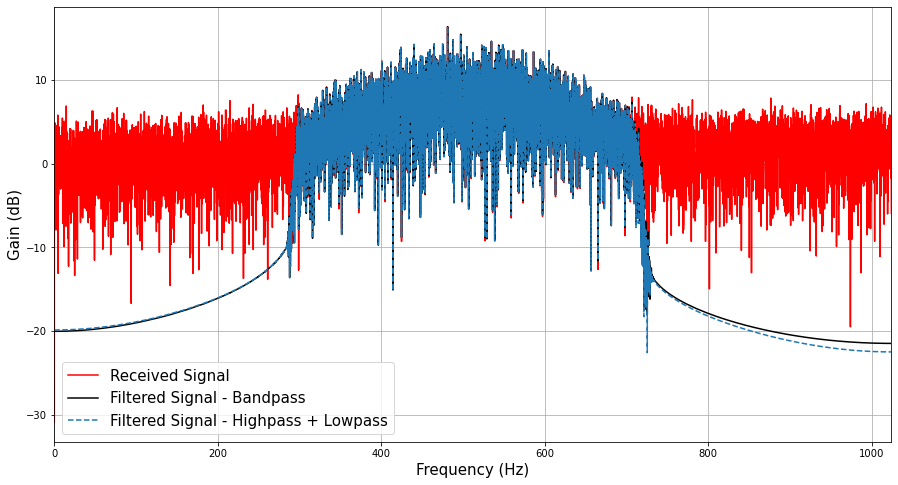

In [49]:
def filt_filt(signal , filt_kernel):
    signal_cont = np.append(signal , signal[::-1])
    out = sig.lfilter(filt_kernel , 1 , signal_cont)
    sig_filtered = sig.lfilter(filt_kernel , 1 , out[::-1])[::-1][:len(signal)]
    return sig_filtered

R_filtered_bandpass = filt_filt(R , filt_kernel)

R_filtered_highpass = filt_filt(R , filt_high_kernel)
R_filtered_lowpass = filt_filt(R_filtered_highpass , filt_low_kernel)

hz = np.linspace(0, sample_rate , Npnts)
R_filtered_bandpass_fft = np.abs(np.fft.fft(R_filtered_bandpass))/Npnts*2
R_filtered_lowpass_fft = np.abs(np.fft.fft(R_filtered_lowpass))/Npnts*2

plt.figure(figsize = (15,8))
plt.plot(hz , 10*np.log10(R_fft) , c = 'red' , label = "Received Signal")
plt.plot(hz , 10*np.log10(R_filtered_bandpass_fft) , c = 'black', label = 'Filtered Signal - Bandpass')
plt.plot(hz , 10*np.log10(R_filtered_lowpass_fft),
         label = 'Filtered Signal - Highpass + Lowpass' , linestyle = 'dashed')
plt.xlim([0 , sample_rate/2])
plt.xlabel('Frequency (Hz)' , fontsize = 15)
plt.ylabel('Gain (dB)' , fontsize = 15)
plt.grid()
plt.legend(fontsize = 15);

In [50]:
sample_rate = 1000 #Hz
timevec = np.arange(-4,4,1/sample_rate)
Npnts = len(timevec)
hz = np.linspace(0 , sample_rate , Npnts)


filt_cut = 15 # Hz

# Sinc-Windowed:
sinc_filt = np.sinc(2*filt_cut*timevec)
sinc_filt = sinc_filt / np.sum(sinc_filt)
hann_win = 0.5 - np.cos(2*np.pi**np.linspace(0 , 1 , Npnts)) / 2
sinc_filt_win = sinc_filt * hann_win
sinc_filt_win_fft = np.abs(np.fft.fft(sinc_filt_win))**2
sinc_Spec = 10*np.log10(sinc_filt_win_fft)
sinc_Spec_3db = np.abs(sinc_Spec) - 3 
cut_3db = np.argmin(sinc_Spec_3db[:np.argmin(np.abs(hz-45))])
f_3db_sinc = hz[cut_3db]
g_3db_sinc = sinc_Spec[cut_3db]
g_2f_sinc = sinc_Spec[np.argmin(np.abs(hz-2*f_3db_sinc))]
Roll_off_sinc = (g_2f_sinc - g_3db_sinc) / (-f_3db_sinc)


# Butterworth Filter:
b , a = sig.butter(5 , 15 , fs = sample_rate)
impulse_response = np.append(np.append(np.zeros(int(Npnts/2)-1) , 1) , np.zeros(int(Npnts/2)) )
but_filt = sig.lfilter(b,a,impulse_response)
but_filt_fft = np.abs(np.fft.fft(but_filt))**2
but_Spec = 10*np.log10(but_filt_fft)
but_Spec_3db = np.abs(np.abs(but_Spec) - 3) 
cut_3db = np.argmin(but_Spec_3db[:np.argmin(np.abs(hz-45))])
f_3db_but = hz[cut_3db]
g_3db_but = but_Spec[cut_3db]
g_2f_but = but_Spec[np.argmin(np.abs(hz-2*f_3db_but))]
Roll_off_but = (g_2f_but - g_3db_but) / (-f_3db_but)


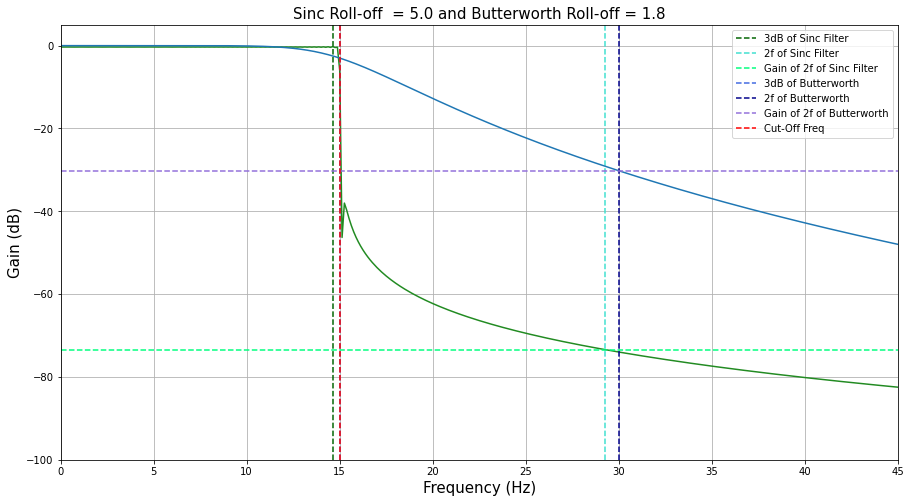

In [51]:
fig , ax = plt.subplots(figsize = (15,8))
ax.plot(hz , sinc_Spec , c = 'forestgreen' )
ax.axvline(f_3db_sinc , linestyle = 'dashed' , c = 'darkgreen' , label = '3dB of Sinc Filter')
ax.axvline(2*f_3db_sinc , linestyle = 'dashed'  , c = 'turquoise' , label = '2f of Sinc Filter')
ax.axhline(g_2f_sinc , linestyle = 'dashed'  , c='springgreen', label = 'Gain of 2f of Sinc Filter')

ax.plot(hz , but_Spec)
ax.axvline(f_3db_but , linestyle = 'dashed' , c = 'royalblue' , label = '3dB of Butterworth')
ax.axvline(2*f_3db_but , linestyle = 'dashed'  ,c = 'darkblue', label = '2f of Butterworth')
ax.axhline(g_2f_but , linestyle = 'dashed'  , c = 'mediumpurple' ,label = 'Gain of 2f of Butterworth')

ax.axvline(filt_cut , linestyle = 'dashed' , c = 'red' , label = 'Cut-Off Freq')

ax.grid()
ax.legend()
ax.set_xlabel('Frequency (Hz)' , fontsize = 15)
ax.set_ylabel('Gain (dB)' , fontsize = 15)
ax.set_title('Sinc Roll-off  = {0:.1f} and Butterworth Roll-off = {1:0.1f}'.format(Roll_off_sinc , Roll_off_but) , 
            fontsize = 15)
ax.set_xlim([0 , 45])
ax.set_ylim([-100 , 5]);

In [52]:
from scipy.io import loadmat
x = loadmat('lineNoiseData.mat')
data = np.reshape(x['data'] , (-1,))[:1000000]
sample_rate = x['srate'][0][0]
Npnts = len(data)
time = Npnts / sample_rate
timevec = np.arange(0 , time , step = 1/sample_rate)

data_fft = np.abs(np.fft.fft(data)/Npnts)**2
hz = np.linspace(0 , sample_rate , Npnts)

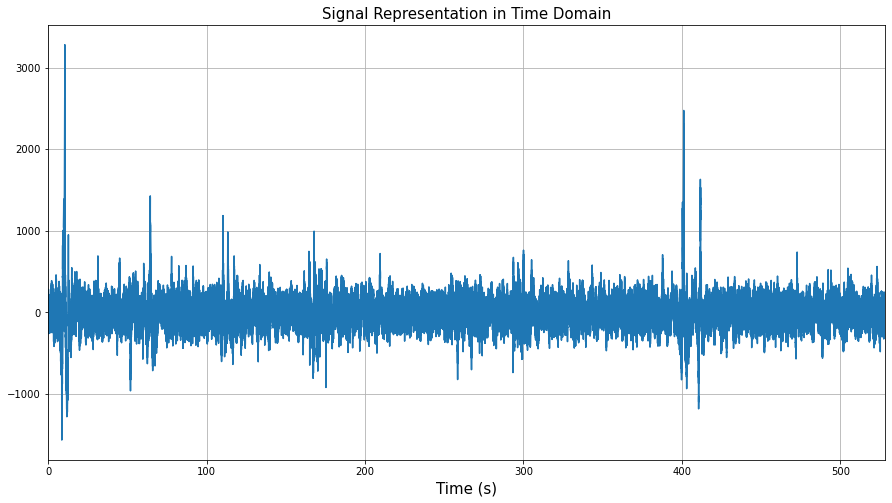

In [53]:
plt.figure(figsize = (15,8))
plt.plot(timevec , data)
plt.xlabel('Time (s)' , fontsize = 15)
plt.title('Signal Representation in Time Domain' , fontsize = 15)
plt.xlim([0 , time])
plt.grid()

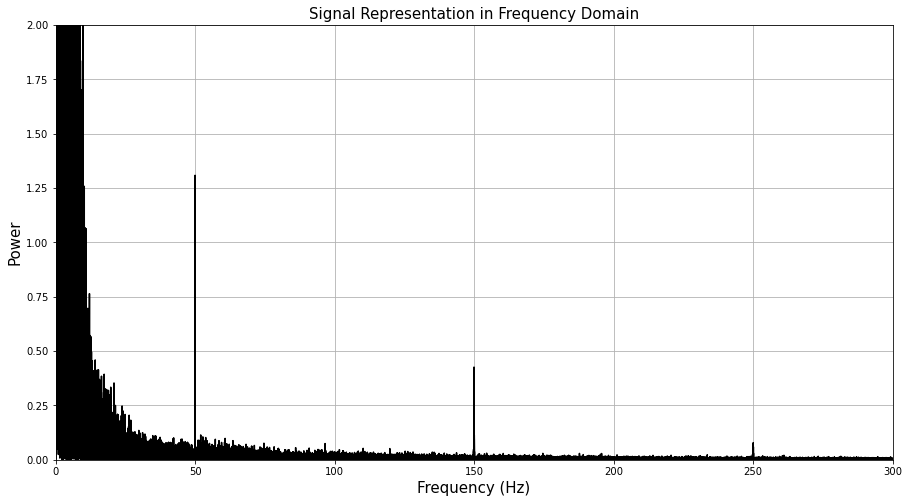

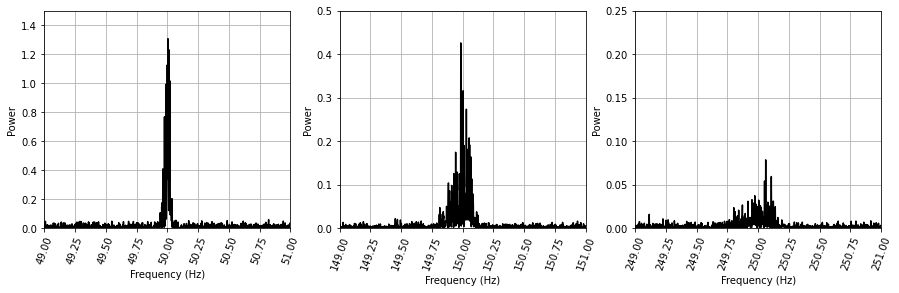

In [54]:
plt.figure(figsize = (15,8))
plt.plot(hz , data_fft , c = 'black')
plt.xlabel('Frequency (Hz)' , fontsize = 15)
plt.ylabel('Power' , fontsize = 15)
plt.title('Signal Representation in Frequency Domain' , fontsize = 15)
plt.xlim([0 , 300])
plt.ylim([0,2])
plt.grid()

plt.figure(figsize = (15,4))
plt.subplot(1, 3, 1)
plt.plot(hz , data_fft , c = 'black')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.xlim([49 , 51])
plt.xticks(rotation=70)
plt.ylim([0,1.5])
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(hz , data_fft , c = 'black')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.xlim([149 , 151])
plt.xticks(rotation=70)
plt.ylim([0,0.5])
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(hz , data_fft , c = 'black')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.xlim([249 , 251])
plt.xticks(rotation=70)
plt.ylim([0,0.25])
plt.grid()

In [55]:
# For the first harmonic:
ideal_shape = [1 , 1 , 0 , 0 , 1 , 1]
filt_50_freq_shape = np.array([0 , 49.8 , 49.81 , 50.2 , 50.21 , sample_rate/2]) / (sample_rate/2)
order = 150*50+1

filt_kernel = sig.firls(order , filt_50_freq_shape , ideal_shape)
data_filt_50 = filt_filt(data , filt_kernel)


# For the second harmonic: 
ideal_shape = [1 , 1 , 0 , 0 , 1 , 1]
filt_150_freq_shape = np.array([0 , 149.8 , 149.81 , 150.2 , 150.21 , sample_rate/2]) / (sample_rate/2)
order = 150*50+1

filt_kernel = sig.firls(order , filt_150_freq_shape , ideal_shape)
data_filt_150 = filt_filt(data_filt_50 , filt_kernel)


# For the third one: 
ideal_shape = [1 , 1 , 0 , 0 , 1 , 1]
filt_250_freq_shape = np.array([0 , 249.8 , 249.81 , 250.2 , 250.21 , sample_rate/2]) / (sample_rate/2)
order = 150*150+1

filt_kernel = sig.firls(order , filt_150_freq_shape , ideal_shape)
data_filt_250 = filt_filt(data_filt_150 , filt_kernel)
data_filt_250_fft = np.abs(np.fft.fft(data_filt_250)/Npnts)**2

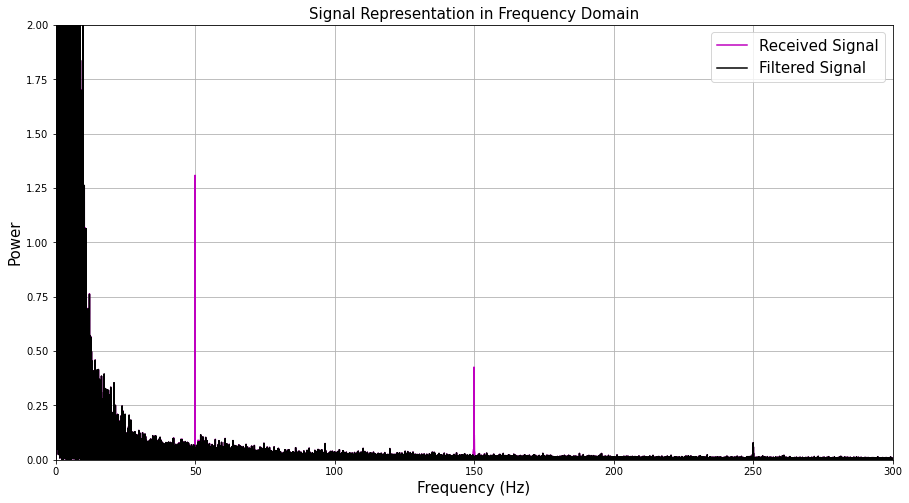

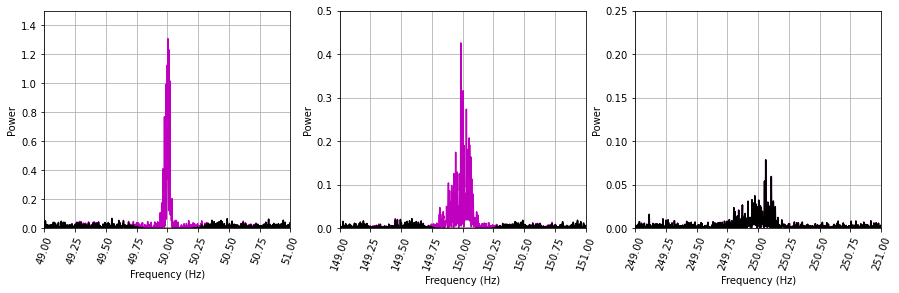

In [56]:
plt.figure(figsize = (15,8))
plt.plot(hz , data_fft , c = 'm' , label = 'Received Signal')
plt.plot(hz , data_filt_250_fft , c = 'black' , label = 'Filtered Signal')
plt.xlabel('Frequency (Hz)' , fontsize = 15)
plt.ylabel('Power' , fontsize = 15)
plt.legend(fontsize = 15)
plt.title('Signal Representation in Frequency Domain' , fontsize = 15)
plt.xlim([0 , 300])
plt.ylim([0,2])
plt.grid()

plt.figure(figsize = (15,4))
plt.subplot(1, 3, 1)
plt.plot(hz , data_fft , c = 'm')
plt.plot(hz , data_filt_250_fft , c = 'black')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.xlim([49 , 51])
plt.xticks(rotation=70)
plt.ylim([0,1.5])
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(hz , data_fft , c = 'm')
plt.plot(hz , data_filt_250_fft , c = 'black')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.xlim([149 , 151])
plt.xticks(rotation=70)
plt.ylim([0,0.5])
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(hz , data_fft , c = 'm')
plt.plot(hz , data_filt_250_fft , c = 'black')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.xlim([249 , 251])
plt.xticks(rotation=70)
plt.ylim([0,0.25])
plt.grid()

In [57]:
x = loadmat('filtering_codeChallenge.mat')
Signal = np.reshape(x['y'] , (-1,))
R = np.reshape(x['x'] , (-1,))
sample_rate = x['fs'][0][0]
Npnts = len(R)
time = Npnts/sample_rate
timevec = np.linspace(0 , time , Npnts)
hz = np.linspace(0 , sample_rate , Npnts)
R_fft = np.abs(np.fft.fft(R)/Npnts)**2
Signal_fft = np.abs(np.fft.fft(Signal)/Npnts)**2

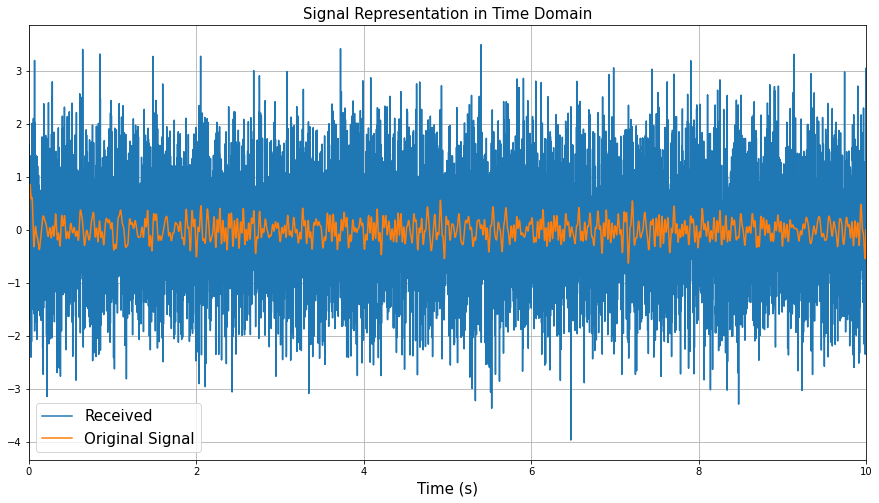

In [58]:
plt.figure(figsize = (15,8))
plt.plot(timevec , R , label = 'Received')
plt.plot(timevec , Signal , label = 'Original Signal')
plt.xlabel('Time (s)' , fontsize = 15)
plt.title('Signal Representation in Time Domain' , fontsize = 15)
plt.xlim([0 , time])
plt.legend(fontsize = 15)
plt.grid()

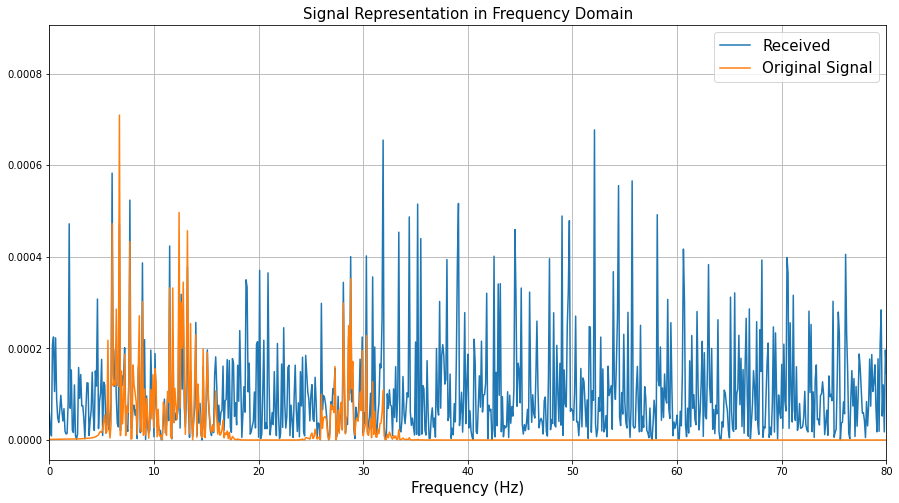

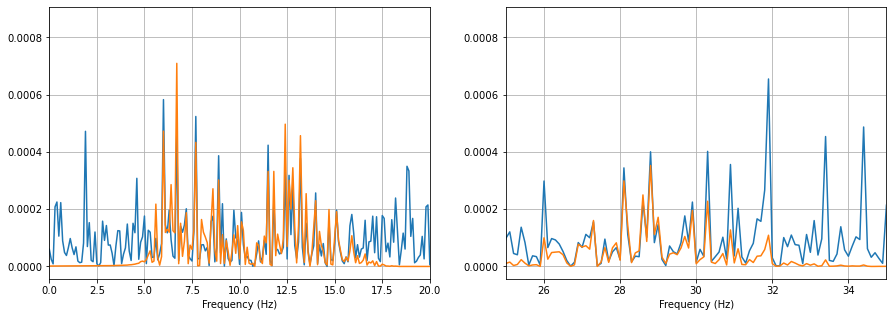

In [59]:
plt.figure(figsize = (15,8))
plt.plot(hz , R_fft , label = 'Received')
plt.plot(hz , Signal_fft , label = 'Original Signal')
plt.xlabel('Frequency (Hz)' , fontsize = 15)
plt.title('Signal Representation in Frequency Domain' , fontsize = 15)
plt.xlim([0 , 80])
plt.legend(fontsize = 15)
plt.grid()

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(hz , R_fft , label = 'Received')
plt.plot(hz , Signal_fft , label = 'Original Signal')
plt.xlabel('Frequency (Hz)')
plt.xlim([0 , 20])
plt.grid()

plt.subplot(1,2,2)
plt.plot(hz , R_fft , label = 'Received')
plt.plot(hz , Signal_fft , label = 'Original Signal')
plt.xlabel('Frequency (Hz)')
plt.xlim([25 , 35])
plt.grid()

In [60]:
# Creating the bigger window part:
ideal_shape = [0 , 0 , 1 , 1 , 0 , 0]
filt_freq_shape_bigger = np.array([0 , 5 , 5.1 , 32 , 32.1 , sample_rate/2]) / (sample_rate/2)
order = 150*50+1

filt_kernel_bigger = sig.firls(order , filt_freq_shape_bigger , ideal_shape)
R_filt_bigger = filt_filt(R , filt_kernel_bigger)
R_filt_bigger_fft = np.abs(np.fft.fft(R_filt_bigger)/Npnts)**2


# Subtracting the middle window: 
ideal_shape = [1 , 1 , 0 , 0 , 1 , 1]
filt_freq_shape_mid = np.array([0 , 17.5 , 17.6 , 26 , 26.1 , sample_rate/2]) / (sample_rate/2)
order = 150*50+1

filt_kernel_mid = sig.firls(order , filt_freq_shape_mid , ideal_shape)
R_filt = filt_filt(R_filt_bigger , filt_kernel_mid)
R_filt_fft = np.abs(np.fft.fft(R_filt)/Npnts)**2

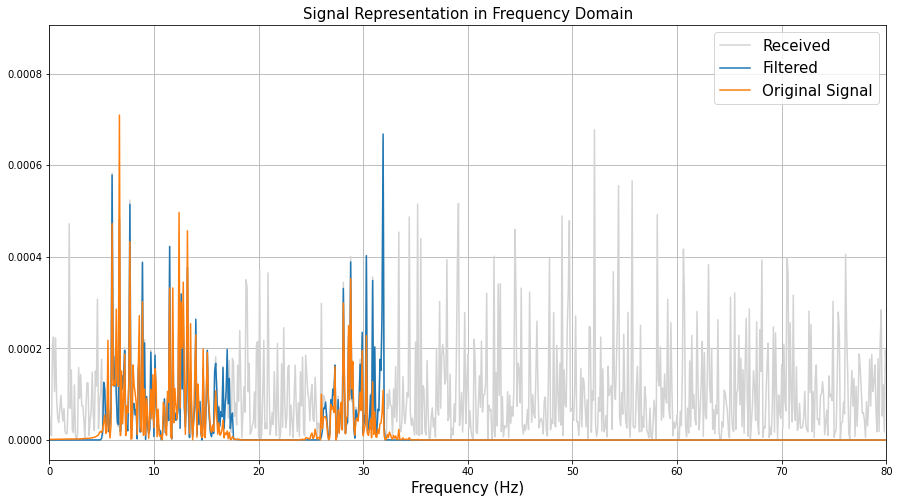

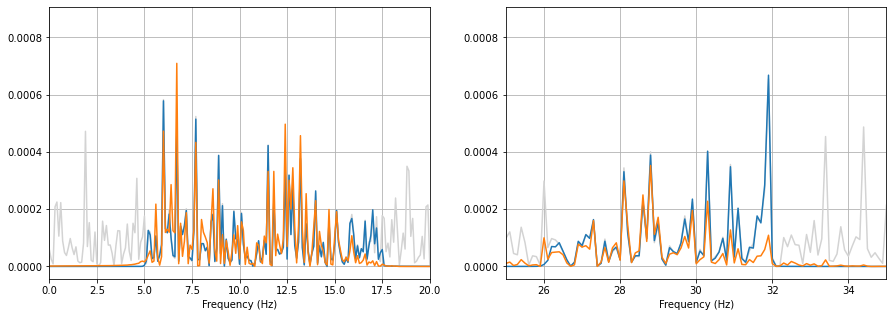

In [61]:
plt.figure(figsize = (15,8))
plt.plot(hz , R_fft , label = 'Received' , c = 'lightgrey')
plt.plot(hz , R_filt_fft , label = 'Filtered')
plt.plot(hz , Signal_fft , label = 'Original Signal')
plt.xlabel('Frequency (Hz)' , fontsize = 15)
plt.title('Signal Representation in Frequency Domain' , fontsize = 15)
plt.xlim([0 , 80])
plt.legend(fontsize = 15)
plt.grid()

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(hz , R_fft , label = 'Received' , c = 'lightgrey')
plt.plot(hz , R_filt_fft , label = 'Filtered')
plt.plot(hz , Signal_fft , label = 'Original Signal')
plt.xlabel('Frequency (Hz)')
plt.xlim([0 , 20])
plt.grid()

plt.subplot(1,2,2)
plt.plot(hz , R_fft , label = 'Received' , c = 'lightgrey')
plt.plot(hz , R_filt_fft , label = 'Filtered')
plt.plot(hz , Signal_fft , label = 'Original Signal')
plt.xlabel('Frequency (Hz)')
plt.xlim([25 , 35])
plt.grid()
